# House Prices: Advanced Regression Technique

In [ ]:
# predicting sale prices of the houses
# dataset is given at https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Phase One: Data Analysis

In [1]:
# import the libraries
import numpy as np
import pandas as pd

# for data visulization
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns of the dataset
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset [download the dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques]
train = pd.read_csv('houseprice_train.csv')
test = pd.read_csv('houseprice_test.csv')

In [3]:
print(train.shape) # number of rows and columns in data
train.head() # for first five records of the train dataset

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# make a list of variables haivng missing values
missingValuesVariables = [missingValues for missingValues in train.columns if train[missingValues].isnull().sum() > 1]

# print variable names and the percentage of missing values
for missingValues in missingValuesVariables:
    print(missingValues, np.round( train[missingValues].isnull().mean(), 3), ' % missing values')

LotFrontage 0.177  % missing values
Alley 0.938  % missing values
MasVnrType 0.005  % missing values
MasVnrArea 0.005  % missing values
BsmtQual 0.025  % missing values
BsmtCond 0.025  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.025  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.055  % missing values
GarageYrBlt 0.055  % missing values
GarageFinish 0.055  % missing values
GarageQual 0.055  % missing values
GarageCond 0.055  % missing values
PoolQC 0.995  % missing values
Fence 0.808  % missing values
MiscFeature 0.963  % missing values


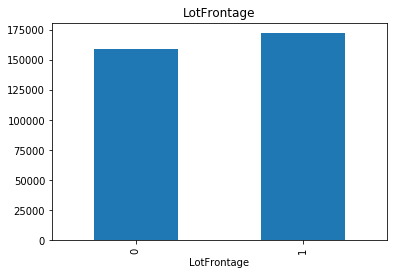

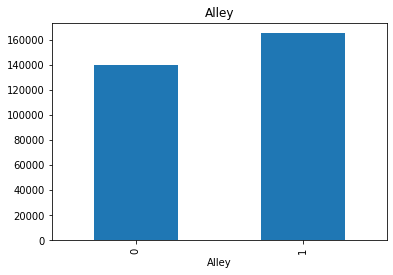

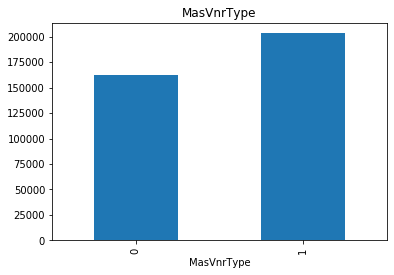

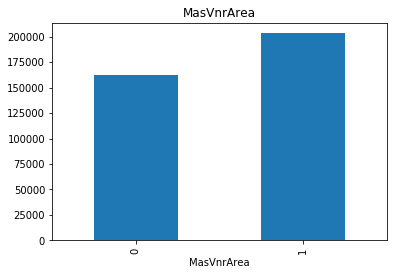

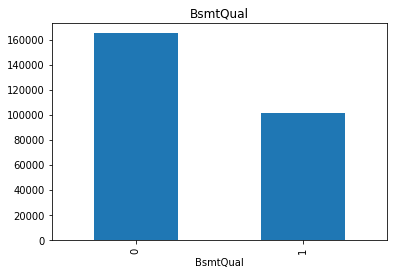

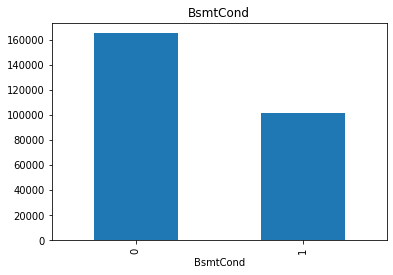

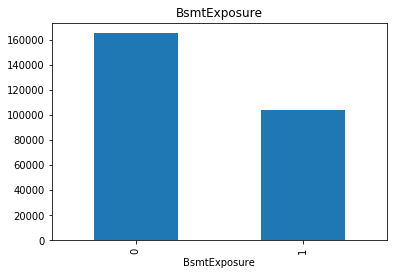

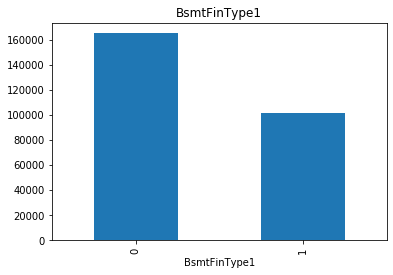

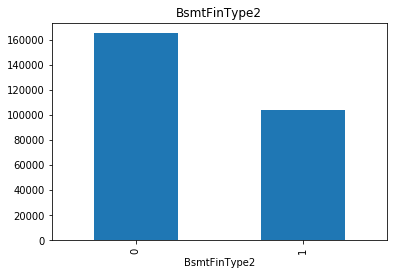

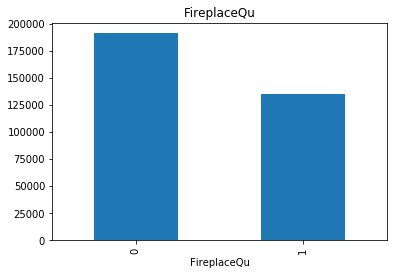

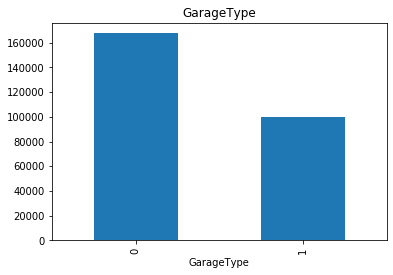

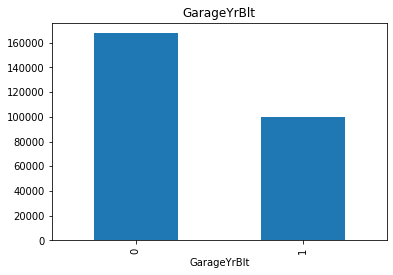

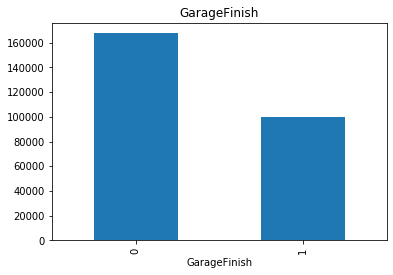

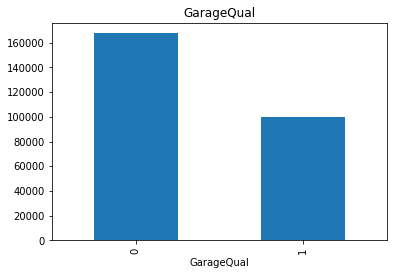

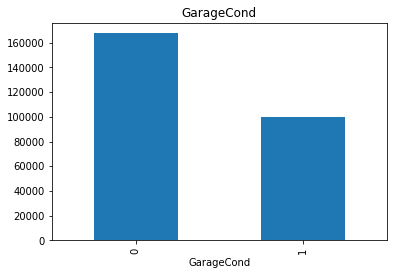

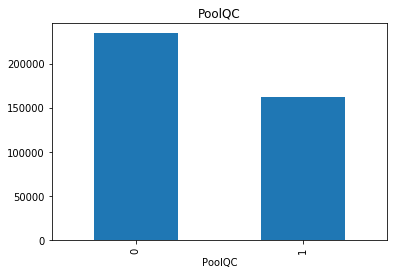

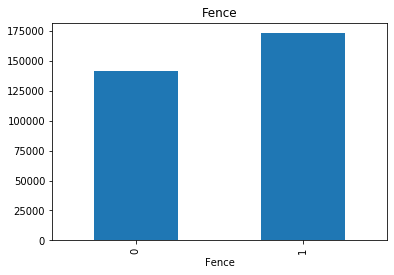

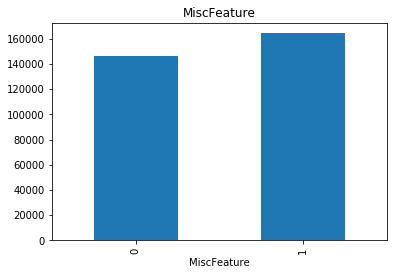

In [5]:
# relationship between missing values and sale prices

def analyse_missingValues(df, missingValues):
    df = df.copy()
    
    # indiactor variable: 1 if observation is missing, else 0
    df[missingValues] = np.where(df[missingValues].isnull(), 1, 0)
    
    # evaluate the mean SalePrice where the information is missing or present
    df.groupby(missingValues)['SalePrice'].median().plot.bar()
    plt.title(missingValues)
    plt.show()
    
for missingValues in missingValuesVariables:
    analyse_missingValues(train, missingValues)

In [6]:
# list of numerical varibles [these are the variables that are not objects and categoricals]
numericalVariables = [numericalVariable for numericalVariable in train.columns if train[numericalVariable].dtypes != 'O']

print('Number of numerical variables: ', len(numericalVariables))
train[numericalVariables].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
print('Number Of House ID labels: ', len(train.Id.unique()))
print('Number Of Houses In Dataset: ', len(train))

Number Of House ID labels:  1460
Number Of Houses In Dataset:  1460


In [8]:
# column named "Id" is of no use as it is having different values in each observations.

In [10]:
# temporal variables [dates or years]

# list of variables that stores year information
yearVariables = [yearVariable for yearVariable in numericalVariables if 'Yr' in yearVariable or 'Year' in yearVariable]
yearVariables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
# YearBuilt: year when the house was built
# YearRemodAdd: year when house was remodeled
# GarageYrBlt: year when garage was added to the house
# YrSold: year when the house was sold

In [11]:
# explore the values of each of the variables [ there will be missing values as well]
for yearValues in yearVariables:
    print(yearValues, train[yearValues].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0.5, 1.0, 'Change in the house price with the years')

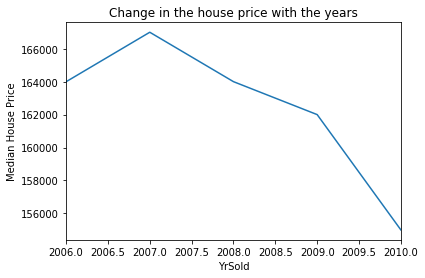

In [12]:
# evaluation of sale prices at the time when houses were sold
train.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in the house price with the years')

In [ ]:
# above diagram says house prices go down after the years

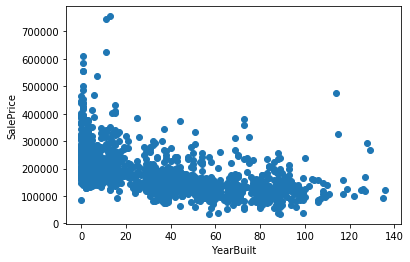

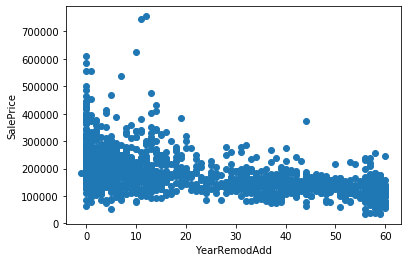

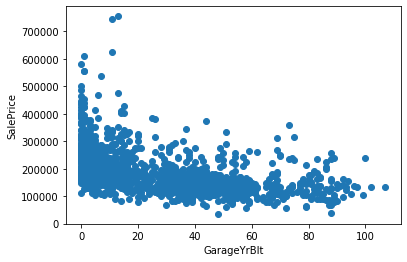

In [13]:
# explore the relationship between year variables and year the house was sold
def analyse_yearVariables(df, yearVariable):
    df = df.copy()
    
    # differences between year variables and the year the house was sold
    # [ below variable shows the timelapse between yearVariable and the year of house been sold]
    df[yearVariable] = df['YrSold'] - df[yearVariable]
    
    plt.scatter(df[yearVariable], df['SalePrice'])
    plt.xlabel(yearVariable)
    plt.ylabel('SalePrice')
    plt.show()
    
for yearVariable in yearVariables:
    if yearVariable != 'YrSold':
        analyse_yearVariables(train, yearVariable)

In [ ]:
# above diagrams states that prices decrease with years

In [ ]:
# Discrete Variables

In [14]:
# list of discrete variables
# [variables having less than twenty different unique values are discrete]
# [yearVariables+['Id'] means ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'Id'] ]
discreteVariables = [discreteVariable for discreteVariable in numericalVariables if len(train[discreteVariable].unique()) < 20 and discreteVariable not in yearVariables+['Id']]
print('Number of discrete variables: ', len(discreteVariables))

Number of discrete variables:  14


In [15]:
train[discreteVariables].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


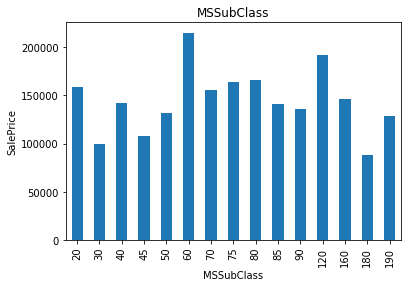

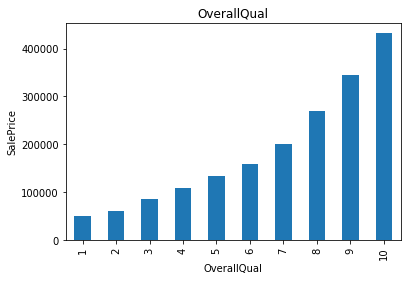

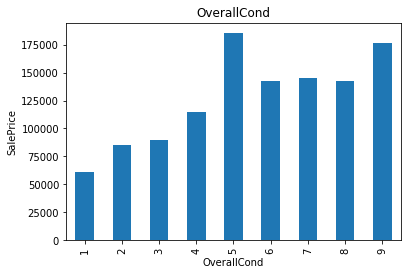

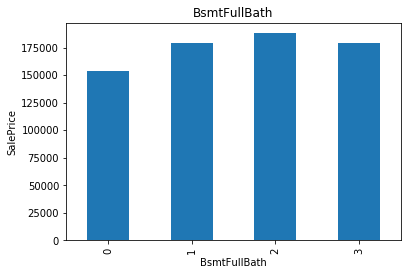

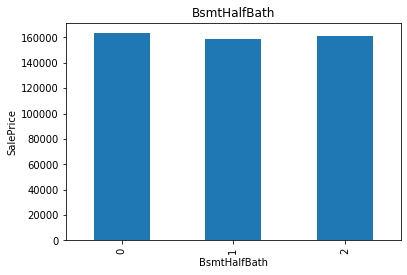

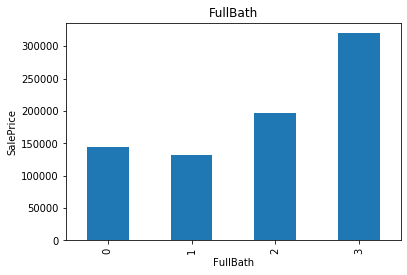

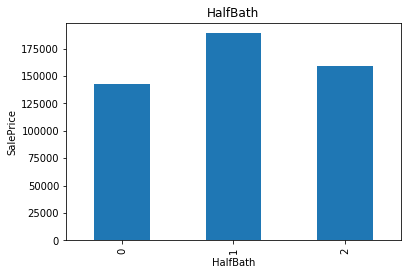

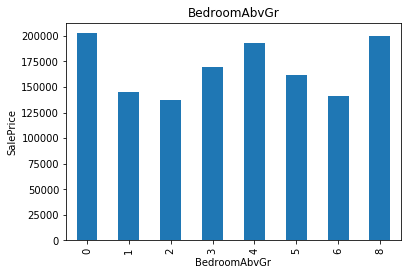

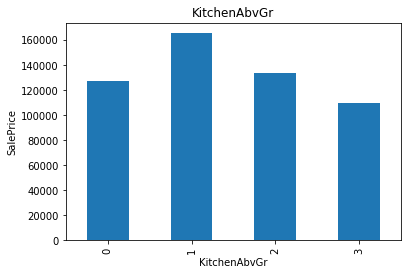

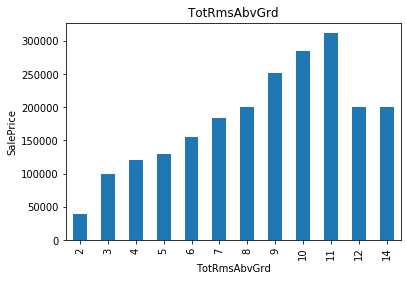

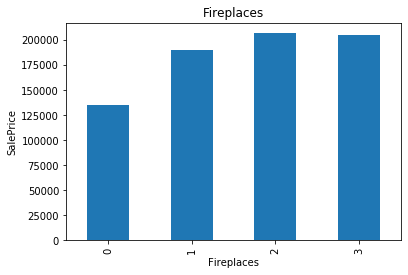

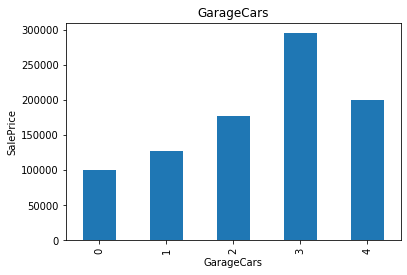

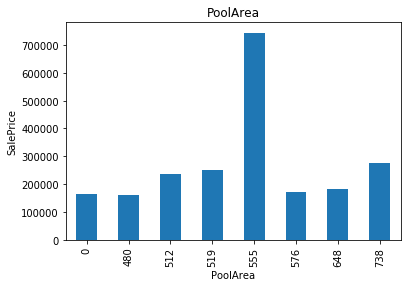

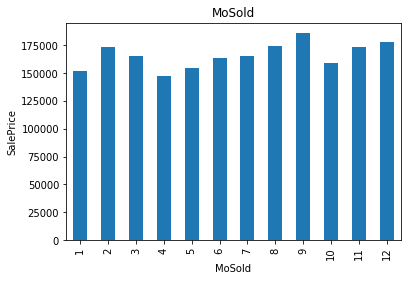

In [20]:
# relationship between discrete variables and targets
def analyse_discreteVariables(df, discreteVariable):
    df = df.copy()
    df.groupby(discreteVariable)['SalePrice'].median().plot.bar()
    plt.title(discreteVariable)
    plt.ylabel('SalePrice')
    plt.show()
    
for discreteVariable in discreteVariables:
    analyse_discreteVariables(train, discreteVariable)

In [ ]:
# OverallQual: seocond diagram shows the increase in quality increases the price of the house
# BsmtHalfBath: fifth diagram shows that this variable is not predictive

In [ ]:
# contineous variables

In [22]:
# list of contineous variables
contineousVariables = [contineousVariable for contineousVariable in numericalVariables if contineousVariable not in discreteVariables+yearVariables+['Id']]

print('Number of contineoius Variables: ', len(contineousVariables))

Number of contineoius Variables:  19


In [23]:
train[contineousVariables].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


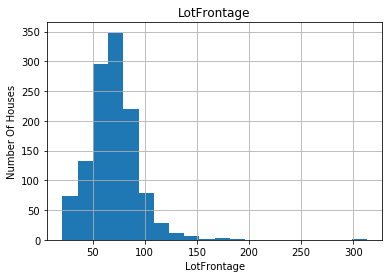

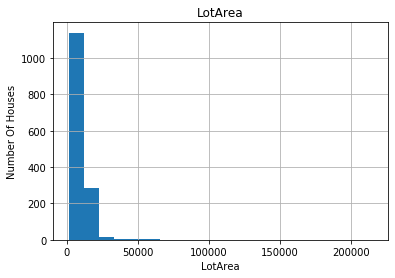

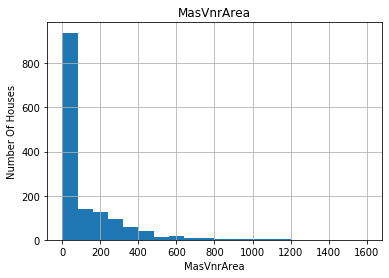

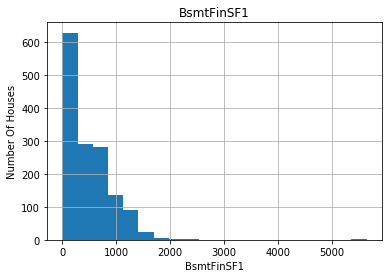

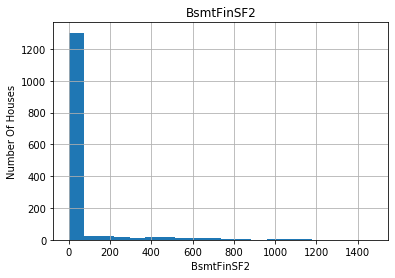

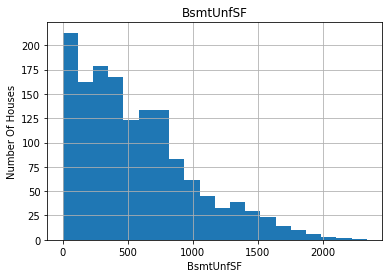

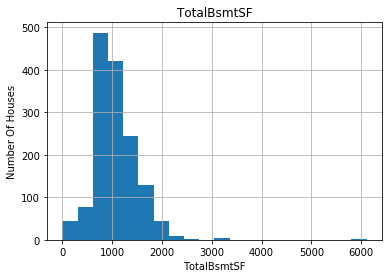

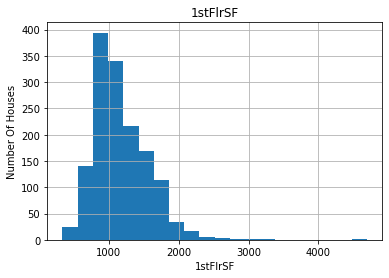

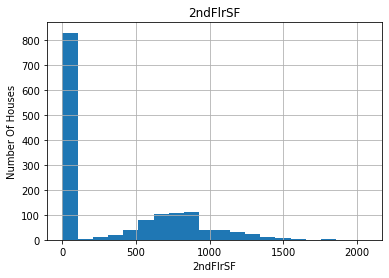

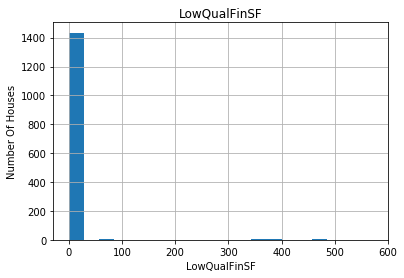

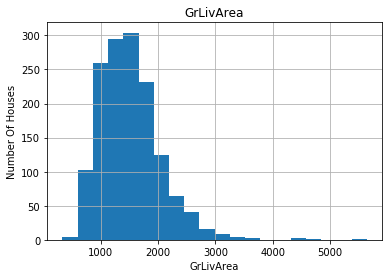

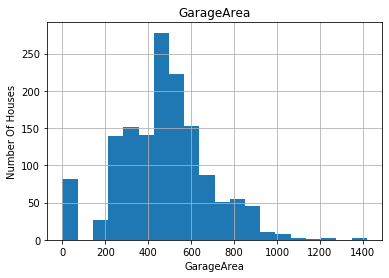

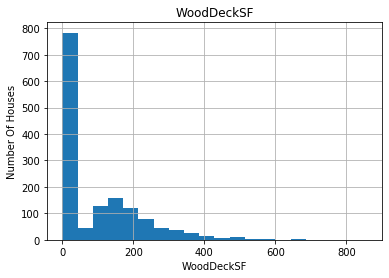

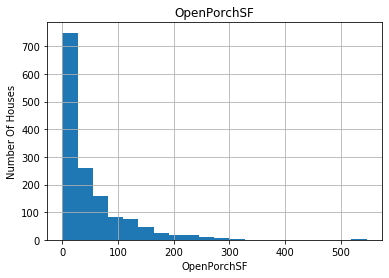

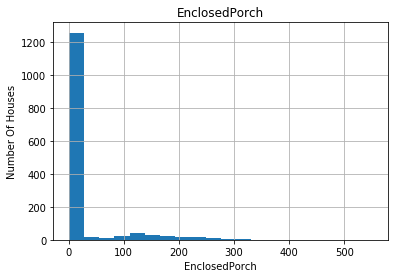

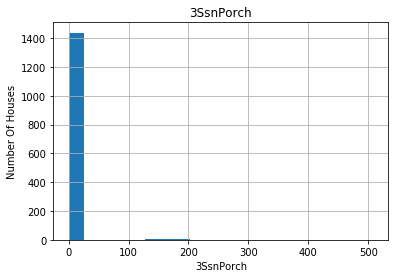

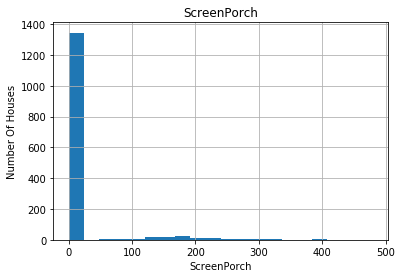

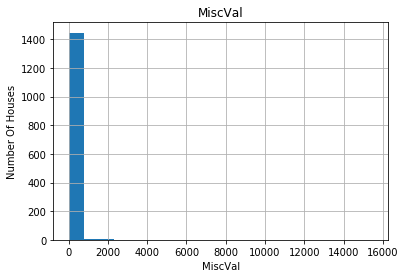

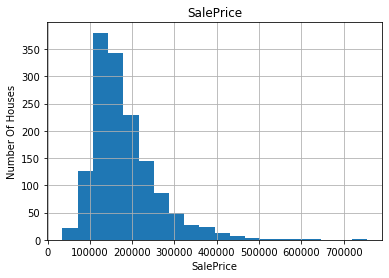

In [26]:
# data analysis the distribution of these variables
def analyse_contineousVariables(df, contineousVariable):
    df = df.copy()
    df[contineousVariable].hist(bins = 20)
    plt.xlabel(contineousVariable)
    plt.ylabel('Number Of Houses')
    plt.title(contineousVariable)
    plt.show()
    
for contineousVariable in contineousVariables:
    analyse_contineousVariables(train, contineousVariable)

In [ ]:
# most of the variables are skewed.
# as we are predicting housing prices, we are likely use liner regression model.
# a linear regression model make use of normally distributed data.

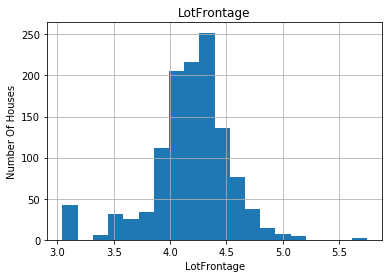

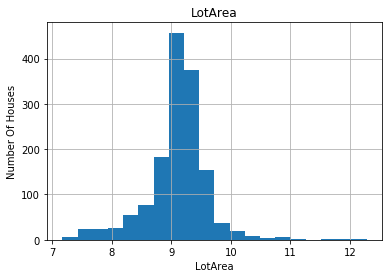

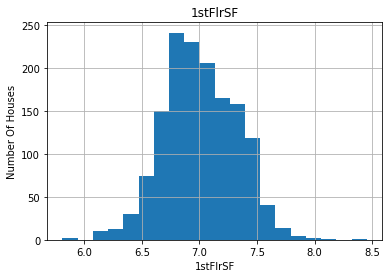

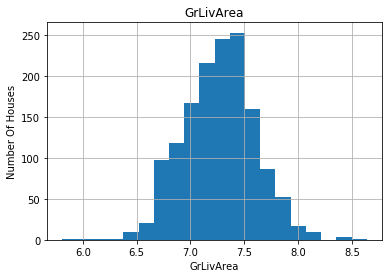

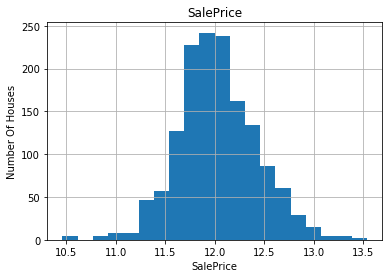

In [29]:
# transforming the distribution to normal distribution
def contineousNormalDistribution(df, contineousVariable):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    
    if 0 in train[contineousVariable].unique():
        pass
    else:
        # log transform the variable
        df[contineousVariable] = np.log(df[contineousVariable])
        df[contineousVariable].hist(bins = 20)
        plt.xlabel(contineousVariable)
        plt.ylabel('Number Of Houses')
        plt.title(contineousVariable)
        plt.show()
        
for contineousVariable in contineousVariables:
    contineousNormalDistribution(train, contineousVariable)

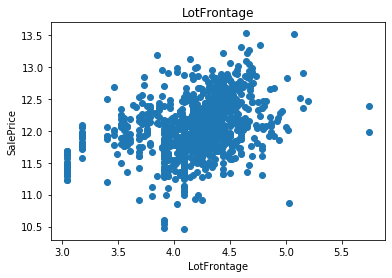

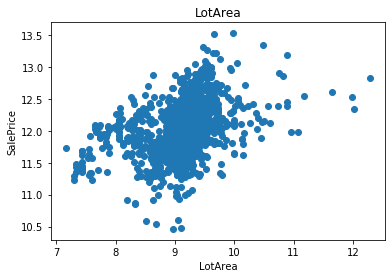

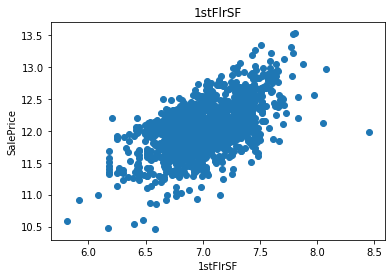

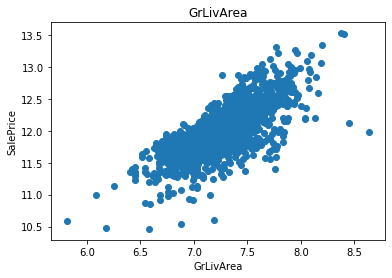

In [32]:
# relationship between house price and the transformed variables with more details
def normalizeContineousVariable(df, contineousVariable):
    df = df.copy()
    
    if 0 in train[contineousVariable].unique():
        pass
    else:
        # log transform
        df[contineousVariable] = np.log(df[contineousVariable])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[contineousVariable], df['SalePrice'])
        plt.xlabel(contineousVariable)
        plt.ylabel('SalePrice')
        plt.title(contineousVariable)
        plt.show()
        
for contineousVariable in contineousVariables:
    if contineousVariable != 'SalePrice':
        normalizeContineousVariable(train, contineousVariable)

In [ ]:
# first two images does not show anything clear, but in last two images
# we can see that higher the GrLivArea value, bigger the house price

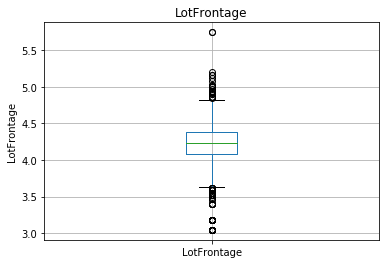

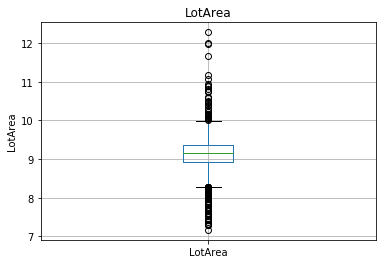

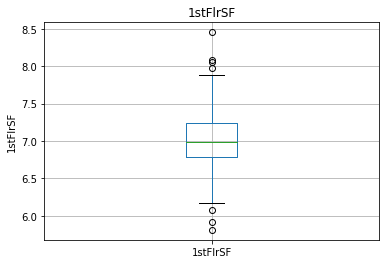

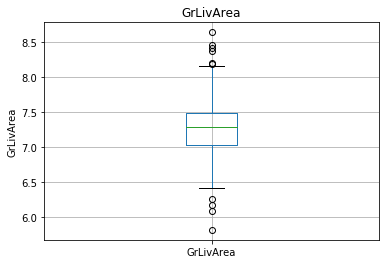

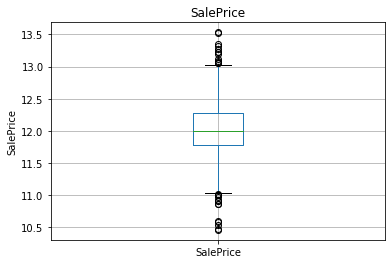

In [33]:
# Outliers in the contineous variable

def findOutliers(df, outlierVariable):
    df = df.copy()
    
    if 0 in train[outlierVariable].unique():
        pass
    else:
        df[outlierVariable] = np.log(df[outlierVariable])
        df.boxplot(column = outlierVariable)
        plt.title(outlierVariable)
        plt.ylabel(outlierVariable)
        plt.show()
        
for outlierVariable in contineousVariables:
    findOutliers(train, outlierVariable)

In [ ]:
# categorical variables

In [35]:
categoricalVariables = [categoricalVariable for categoricalVariable in train.columns if train[categoricalVariable].dtypes == 'O']
print('Number of categorical variables: ', len(categoricalVariables))

Number of categorical variables:  43


In [36]:
train[categoricalVariables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [37]:
# number of labels: cardinality
for categoricalVariable in categoricalVariables:
    print(categoricalVariable, len(train[categoricalVariable].unique()), ' categories')

MSZoning 5  categories
Street 2  categories
Alley 3  categories
LotShape 4  categories
LandContour 4  categories
Utilities 2  categories
LotConfig 5  categories
LandSlope 3  categories
Neighborhood 25  categories
Condition1 9  categories
Condition2 8  categories
BldgType 5  categories
HouseStyle 8  categories
RoofStyle 6  categories
RoofMatl 8  categories
Exterior1st 15  categories
Exterior2nd 16  categories
MasVnrType 5  categories
ExterQual 4  categories
ExterCond 5  categories
Foundation 6  categories
BsmtQual 5  categories
BsmtCond 5  categories
BsmtExposure 5  categories
BsmtFinType1 7  categories
BsmtFinType2 7  categories
Heating 6  categories
HeatingQC 5  categories
CentralAir 2  categories
Electrical 6  categories
KitchenQual 4  categories
Functional 7  categories
FireplaceQu 6  categories
GarageType 7  categories
GarageFinish 4  categories
GarageQual 6  categories
GarageCond 6  categories
PavedDrive 3  categories
PoolQC 4  categories
Fence 5  categories
MiscFeature 5  categor

In [ ]:
# all the categorical variables show low cardinality, this means that they have only few different labels.
# that is good as we won't need to tackle cardinality during our feature engineering lecture.

In [40]:
# Rare Labels [ if there are labels that are present only in a small number of houses]
# value of a variable that has less than certain level of percentage [ those categories that shows less than 1% of observations]
def rareLabels(df, rareLabelVariables, rarePercentage):
    df = df.copy()
    tmp = df.groupby(rareLabelVariables)['SalePrice'].count() / len(df)
    return tmp[tmp < rarePercentage]

for rareLabelVariable in categoricalVariables:
    print(rareLabels(train, rareLabelVariable, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

In [ ]:
# above variables can be or cannot be presented in test set.